# RateBeer

In [1]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
importlib.reload(utils)


<module 'utils' from '/Users/arimongomis/Desktop/EPFL/ADA/ada-2024-project-mediterranean/src/preprocessing/utils.py'>

## Files loadings

In [2]:
beers_rate = pd.read_csv("../../data/Original/RateBeer/beers.csv", sep=",")
breweries_rate = pd.read_csv("../../data/Original/RateBeer/breweries.csv", sep=",")
users_rate = pd.read_csv("../../data/Original/RateBeer/users.csv", sep=",")

## Data processing

### Beers

In [3]:
utils.dataset_information(beers_rate, "Beers_RB")



########################################################
We are starting analysing dataset Beers_RB
- Dimension of starting dataset: (442081, 14)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id               beer_name  brewery_id      brewery_name  \
0   410549       33 Export (Gabon)        3198           Sobraga   
1   105273     Castel Beer (Gabon)        3198           Sobraga   
2    19445                   Régab        3198           Sobraga   
3   155699  Ards Bally Black Stout       13538  Ards Brewing Co.   
4   239097        Ards Belfast 366       13538  Ards Brewing Co.   

                  style  nbr_ratings  overall

Ensurance of correct data types:

In [4]:
utils.ensure_col_types(beers_rate,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [5]:
beers_rate.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


Keep only beers that have atleast one rating. Only beers that have been tried are wanted. Column `nbr_reviews` not present in this dataset while in Beer Advocate it does.

In [6]:
beers_rate_filt = beers_rate[(beers_rate['nbr_ratings'] != 0)].copy()
beers_rate_filt['nbr_ratings'].describe()

count    396690.000000
mean         17.953752
std          85.303131
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        5272.000000
Name: nbr_ratings, dtype: float64

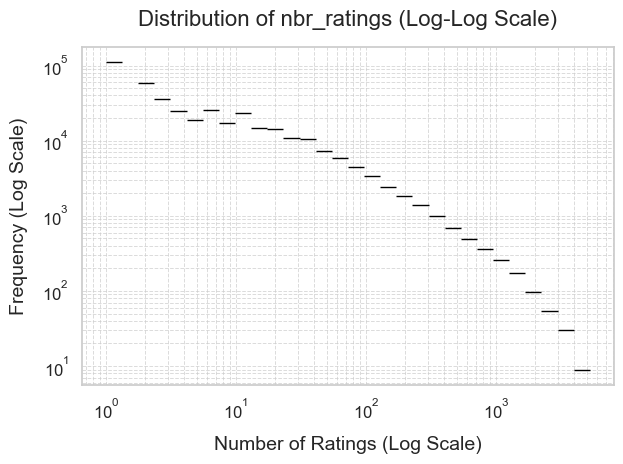

In [7]:
sns.set_theme(style="whitegrid")
sns.histplot(beers_rate_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Duplicates dealing:

In [8]:
print(beers_rate_filt['beer_id'].duplicated().describe())

count     396690
unique         1
top        False
freq      396690
Name: beer_id, dtype: object


In [9]:
print(beers_rate_filt['beer_name'].duplicated().describe())
duplicated_beer_id_rows = beers_rate_filt[beers_rate_filt['beer_name'].duplicated(keep=False)]
duplicated_beer_id_rows.head(10)

count     396690
unique         2
top        False
freq      396462
Name: beer_name, dtype: object


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
1046,71384,Brück Lager,2897,Guangzhou San Miguel Brewery Company,Pale Lager,4,NaN,NaN,2.29,4.5,1.575000,NaN,0,NaN
1243,53959,Landmark Premium Beer,6439,Landmark Brewery,Pale Lager,2,NaN,NaN,2.55,NaN,1.950000,NaN,0,NaN
1623,420089,Taps Barley Wine,24074,Taps Brewpub (Shenzhen),Barley Wine,1,NaN,NaN,3.00,12.5,3.300000,NaN,0,NaN
2486,166443,Brück Lager,2483,San Miguel Brewery (Hong Kong),Pale Lager,7,NaN,NaN,2.19,4.5,1.600000,NaN,0,NaN
2502,427856,Tipping Point Pale Ale,21897,Tipping Point Brewing Co.,American Pale Ale,7,NaN,NaN,2.54,4.8,2.342857,NaN,0,NaN
5598,422836,Syndicate Roses Name Abbey Dubbel,26083,Syndicate Beer & Grill,Abbey Dubbel,1,NaN,NaN,3.00,6.0,3.300000,NaN,0,NaN
5599,408166,Syndicate Roses Name Abbey Dubbel,26083,Syndicate Beer & Grill,Abbey Dubbel,3,NaN,NaN,2.78,6.0,2.600000,NaN,0,NaN
6292,425137,Paddys Porter,3828,Paddys Pub & Rosies Restaurant,Porter,1,NaN,NaN,3.00,NaN,3.300000,NaN,0,NaN
6858,47998,Co-op Gold Premium Light Lager,491,Great Western Brewing &#40;Canadian Brewing&#41;,Pale Lager,5,NaN,NaN,2.23,4.0,1.600000,NaN,0,NaN
7047,304975,Rebellion IPA,21430,Rebellion Brewing &#40;Canada&#41;,India Pale Ale (IPA),9,NaN,NaN,3.49,6.5,3.777778,NaN,0,NaN


We have cases where `beer_name` is the same but `brewery_id` not, suggesting existance of cases where same beer is produced at two different places. We need to deal with this. We will also use 'style' as variable to avoid duplicates:

In [10]:
duplicates = beers_rate_filt[beers_rate_filt.duplicated(subset=['beer_name', 'brewery_name','style'], keep=False)]

print(duplicates.shape)
duplicates.head()

(118, 14)


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
5598,422836,Syndicate Roses Name Abbey Dubbel,26083,Syndicate Beer & Grill,Abbey Dubbel,1,NaN,NaN,3.00,6.0,3.30,NaN,0,NaN
5599,408166,Syndicate Roses Name Abbey Dubbel,26083,Syndicate Beer & Grill,Abbey Dubbel,3,NaN,NaN,2.78,6.0,2.60,NaN,0,NaN
10082,510163,Isle de Garde Bitter Ordinaire,21105,Isle de Garde,Bitter,2,NaN,NaN,3.12,3.9,3.50,NaN,0,NaN
10107,466250,Isle de Garde Bitter Ordinaire,21105,Isle de Garde,Bitter,2,NaN,NaN,3.19,3.5,3.70,NaN,0,NaN
22501,21535,Brewhouse Scotch Ale,1154,Whistler Brewhouse/High Mountain,Scotch Ale,2,NaN,NaN,2.85,6.7,3.15,NaN,0,NaN


In [11]:
merged_duplicates= duplicates.groupby(['beer_name', 'brewery_name','style']).agg({
    'beer_id': 'first',
    'brewery_id': 'first',
    'nbr_ratings': 'sum',
    'overall_score': 'mean',
    'style_score': 'mean',
    'avg': 'mean',
    'abv': 'first',
    'avg_computed': 'mean',
    'zscore': 'mean',
    'nbr_matched_valid_ratings': 'sum',
    'avg_matched_valid_ratings': 'mean'               
}).reset_index()

print(merged_duplicates.shape)
merged_duplicates.head()


(59, 14)


,beer_name,brewery_name,style,beer_id,brewery_id,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,4 Pines Keller Door Christmas Saison,4 Pines Brewing Company,Saison,303028,10026,13,48.0,26.0,3.150,5.5,3.404545,NaN,0,NaN
1,Abe Erb Covfefe,Abe Erb Brewing Co,Wheat Ale,520905,21316,2,NaN,NaN,3.055,4.9,3.550000,NaN,0,NaN
2,BarrelHouse Night Ryder,BarrelHouse Brewing Company,Black IPA,376199,16369,2,NaN,NaN,2.905,8.6,3.250000,NaN,0,NaN
3,Basarene Talas Om Solbær Stout,Basarene Bryggeri,Stout,378469,25190,5,NaN,NaN,3.030,6.0,3.150000,NaN,0,NaN
4,Beaver (Vienna) Akrasia,Beaver Brewing Company (Vienna),Barley Wine,498857,25157,9,NaN,NaN,3.375,10.5,3.832143,NaN,0,NaN


In [12]:
beers_rate_filt = beers_rate_filt.drop(duplicates.index)
beers_rate_filt = pd.concat([beers_rate_filt, merged_duplicates], ignore_index=True)
beers_rate_filt.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


No duplicates. Everythinh has been dealt with.

### Breweries

In [13]:
utils.dataset_information(breweries_rate, "Breweries_RB")



########################################################
We are starting analysing dataset Breweries_RB
- Dimension of starting dataset: (24189, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
       id          location                       name  nbr_beers
0   3198             Gabon                    Sobraga          3
1  13538  Northern Ireland           Ards Brewing Co.         13
2  22304  Northern Ireland  Barrahooley Craft Brewery          4
3  22818  Northern Ireland                   Boundary         66
4  24297  Northern Ireland            Brewbot Belfast          3


Drop breweries with null `nbr_beers`:

In [14]:
breweries_rate['nbr_beers'].describe()

count    24189.000000
mean        19.022655
std         31.542620
min          0.000000
25%          3.000000
50%          8.000000
75%         20.000000
max        295.000000
Name: nbr_beers, dtype: float64

In [15]:
breweries_rate_filt = breweries_rate[(breweries_rate['nbr_beers'] != 0)].copy()
breweries_rate_filt.reset_index(drop=True, inplace=True)
breweries_rate_filt = breweries_rate_filt.drop(columns=['index'], errors='ignore')
breweries_rate_filt['nbr_beers'].describe()

count    24118.000000
mean        19.078655
std         31.572100
min          1.000000
25%          3.000000
50%          8.000000
75%         20.000000
max        295.000000
Name: nbr_beers, dtype: float64

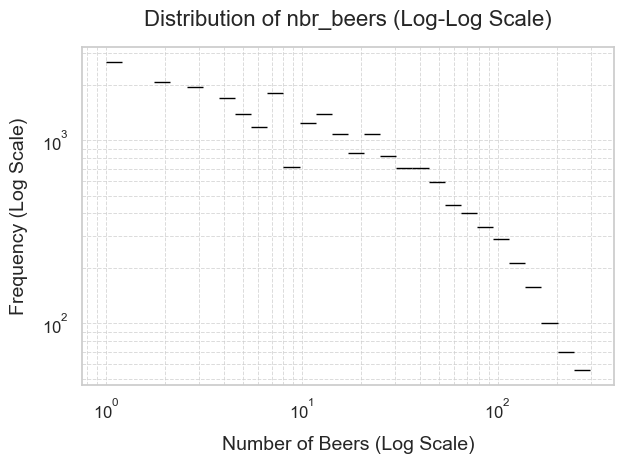

In [16]:
sns.set_theme(style="whitegrid")
sns.histplot(breweries_rate_filt['nbr_beers'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Beers (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_beers (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Location analysis:

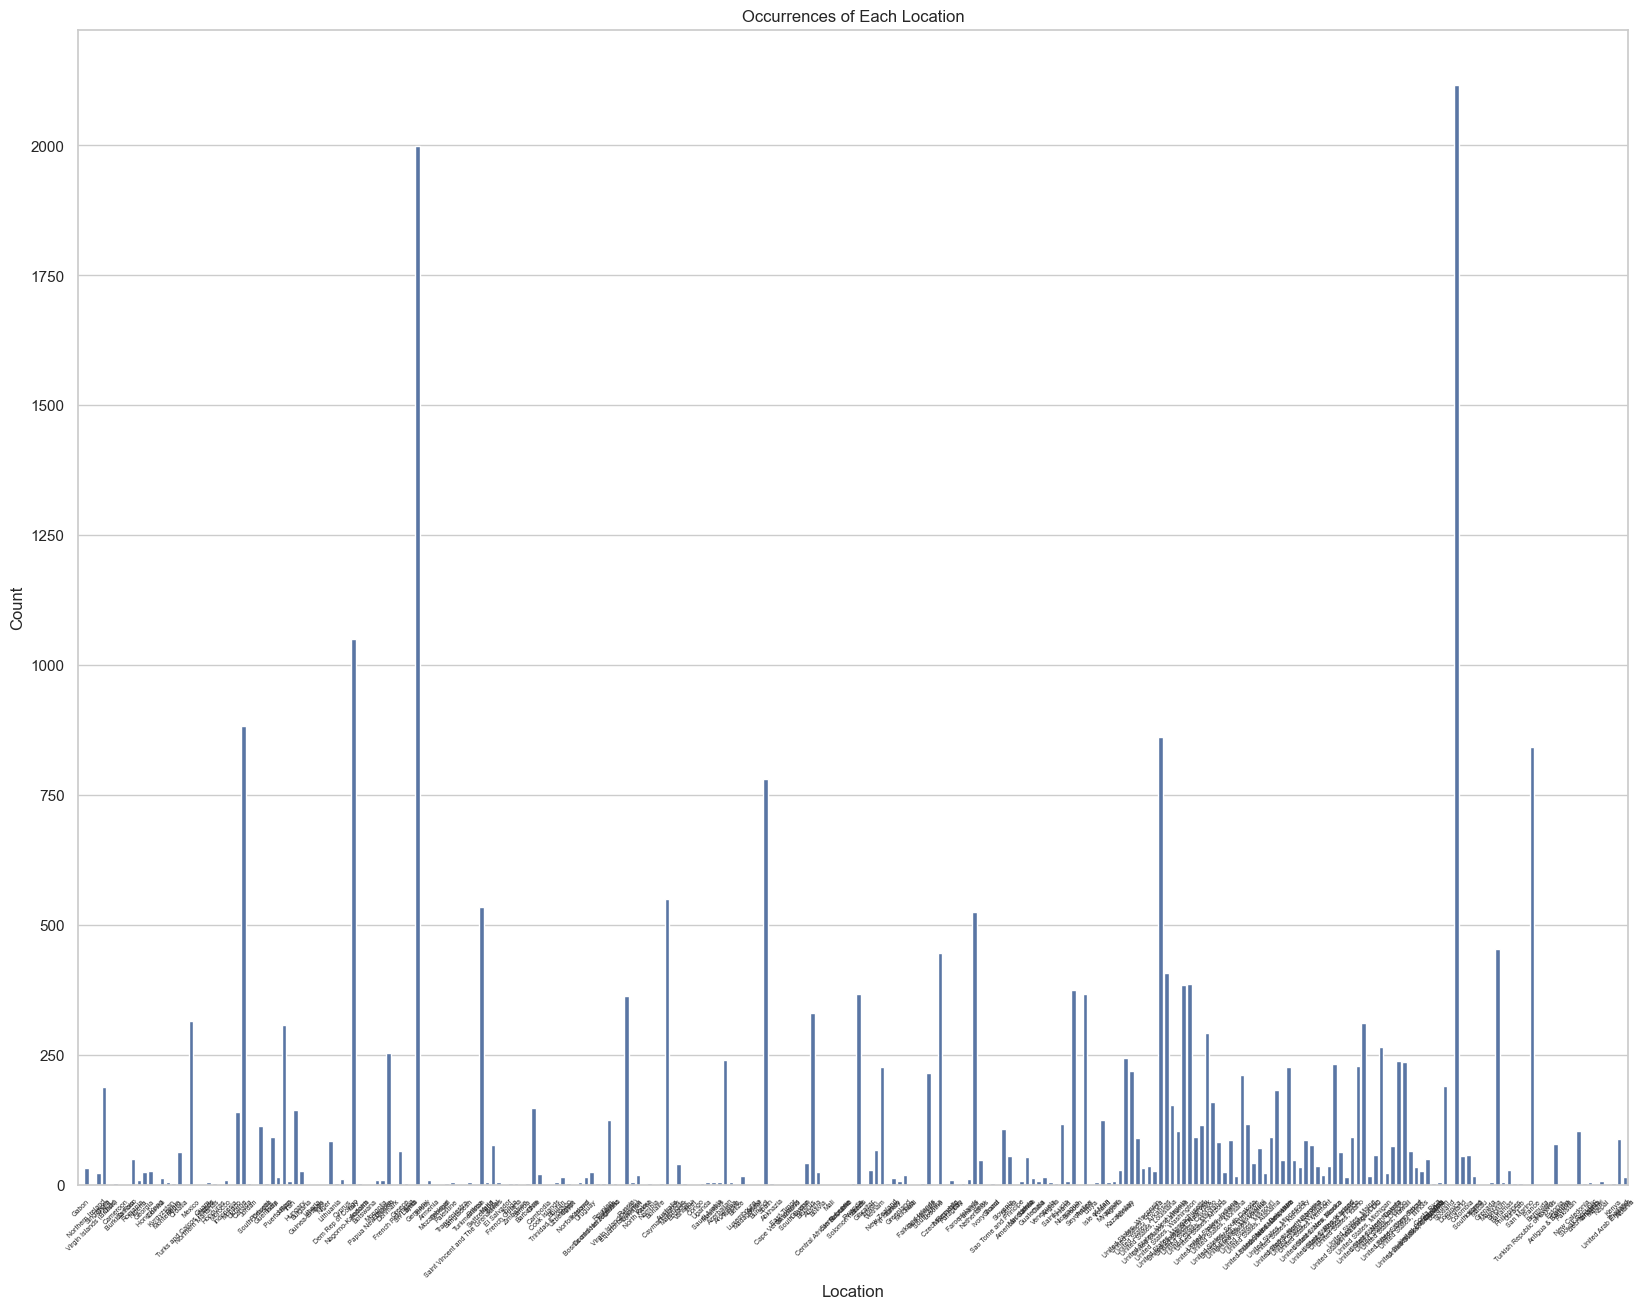

In [17]:
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_rate_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=5) 
plt.show()

There are no links issues. Let's investigate location + region cases:

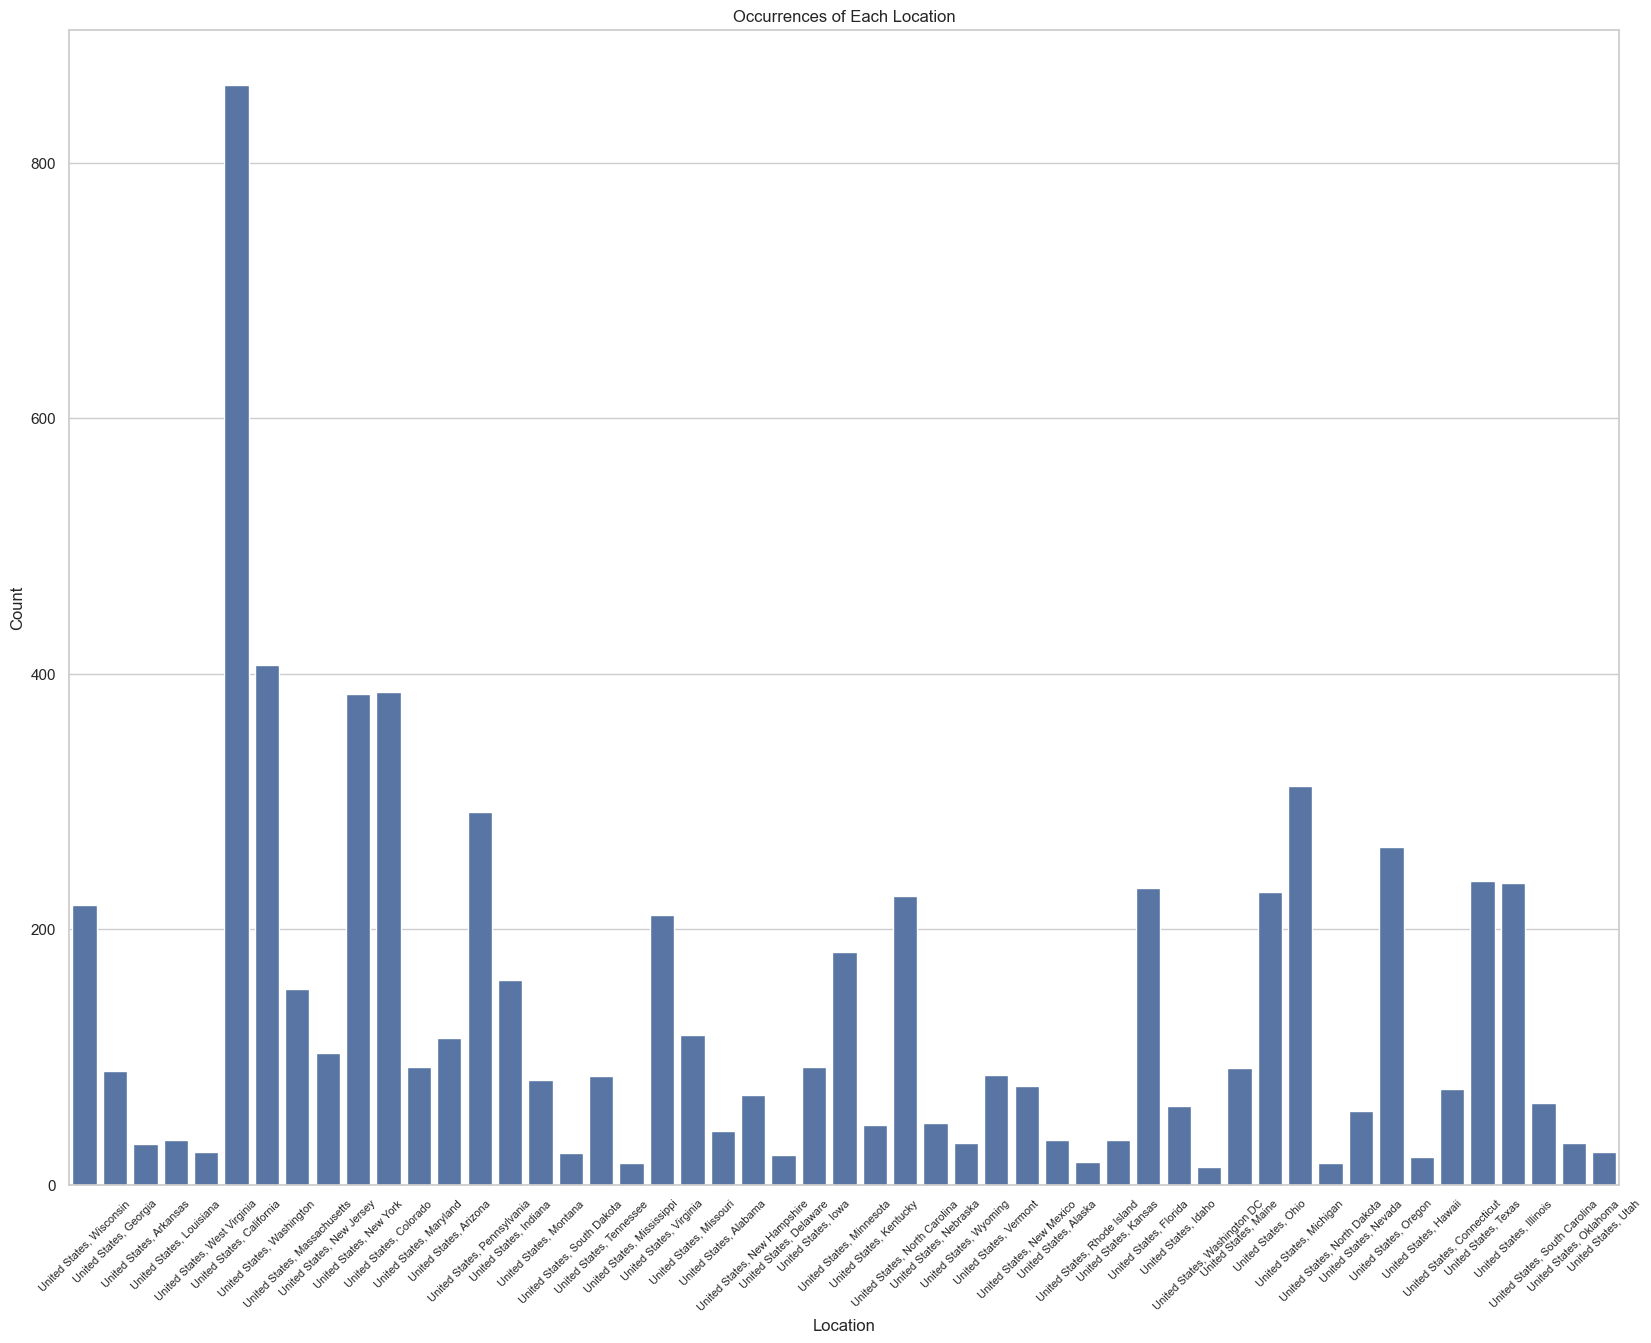

In [18]:
breweries_rate_filt['Regions'] = breweries_rate_filt['location'].str.contains(r"[,\|<]", case=False, na=False)

plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_rate_filt[breweries_rate_filt['Regions'] == True], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

In [19]:
breweries_rate_filt[['location', 'location_region']] = breweries_rate_filt['location'].str.split(',', n=1, expand=True)
breweries_rate_filt['location'] = breweries_rate_filt['location'].str.strip()
breweries_rate_filt.reset_index(drop = True, inplace=False)
breweries_rate_filt = utils.update_location_and_region(breweries_rate_filt)
breweries_rate_filt['location_region'] = breweries_rate_filt['location_region'].str.strip()
breweries_rate_filt.head(20)

,id,location,name,nbr_beers,Regions,location_region
0,3198,Gabon,Sobraga,3,False,None
1,13538,United Kingdom,Ards Brewing Co.,13,False,Northern Ireland
2,22304,United Kingdom,Barrahooley Craft Brewery,4,False,Northern Ireland
3,22818,United Kingdom,Boundary,66,False,Northern Ireland
4,24297,United Kingdom,Brewbot Belfast,3,False,Northern Ireland
5,27006,United Kingdom,Bullhouse Brewing Company,6,False,Northern Ireland
6,12090,United Kingdom,Clanconnel,7,False,Northern Ireland
7,18096,United Kingdom,Clearsky,3,False,Northern Ireland
8,19858,United Kingdom,Cloughmore,3,False,Northern Ireland
9,19507,United Kingdom,Farmageddon Brewing Co-Op,23,False,Northern Ireland


In [20]:
breweries_rate_filt['US'] = breweries_rate_filt['location'].str.contains("United States", case=False, na=False)
breweries_rate_filt['UK'] = breweries_rate_filt['location'].str.contains("United Kingdom", case=False, na=False)
breweries_rate_filt['Canada'] = breweries_rate_filt['location'].str.contains("Canada", case=False, na=False)

breweries_rate_filt.loc[breweries_rate_filt['location_region'] == "United States", 'location_region'] = np.nan

breweries_rate_filt = breweries_rate_filt.drop(columns=['Regions'], errors='ignore')

breweries_rate_filt.head()

,id,location,name,nbr_beers,location_region,US,UK,Canada
0,3198,Gabon,Sobraga,3,None,False,False,False
1,13538,United Kingdom,Ards Brewing Co.,13,Northern Ireland,False,True,False
2,22304,United Kingdom,Barrahooley Craft Brewery,4,Northern Ireland,False,True,False
3,22818,United Kingdom,Boundary,66,Northern Ireland,False,True,False
4,24297,United Kingdom,Brewbot Belfast,3,Northern Ireland,False,True,False


Let's check for duplicates:

In [21]:
print(breweries_rate_filt['id'].duplicated().describe())

count     24118
unique        1
top       False
freq      24118
Name: id, dtype: object


Now we can merge the location column information to the beers dataset already processed:

In [22]:
breweries_rate_filt.rename(columns={'id': 'brewery_id'}, inplace=True)
breweries_rate_filt.rename(columns={'name': 'brewery_name'}, inplace=True)


beers_rate_filt_unique_location = beers_rate_filt.merge(
    breweries_rate_filt[['brewery_id','brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_id',
    how='left'
)

beers_rate_filt_unique_location.rename(columns={'brewery_name_x': 'brewery_name'}, inplace=True)

beers_rate_filt_unique_location.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,brewery_name_y,location,location_region,US,UK,Canada
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN,Sobraga,Gabon,None,False,False,False
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN,Sobraga,Gabon,None,False,False,False
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN,Sobraga,Gabon,None,False,False,False
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667,Ards Brewing Co.,United Kingdom,Northern Ireland,False,True,False
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN,Ards Brewing Co.,United Kingdom,Northern Ireland,False,True,False


### Users

In [23]:
utils.dataset_information(users_rate, "Users_RB")



########################################################
We are starting analysing dataset Users_RB
- Dimension of starting dataset: (70174, 5)
- Columns of dataset:  Index(['nbr_ratings', 'user_id', 'user_name', 'joined', 'location'], dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    nbr_ratings  user_id     user_name        joined location
0         1890   175852       Manslow  1.337508e+09   Poland
1           89   442761  MAGICuenca91  1.484046e+09    Spain
2          169   288889        Sibarh  1.384600e+09   Poland
3         3371   250510       fombe89  1.363950e+09    Spain
4        13043   122778    kevnic2008  1.296644e+09  Germany


We need to deal with `joined` and `location`:

* `joined`: usage of datetime functions of `pandas` to transform the seconds into proper date structure.
* `location`: same approach as breweries and beers datasets. Division into `location`, `location_region` and booleans for quick identification of US, UK and Canada cases. 

In [24]:
users_rate['joined'] = pd.to_datetime(users_rate['joined'], unit='s')

users_rate[['location', 'location_region']] = users_rate['location'].str.split(',', n=1, expand=True)

print(users_rate['user_id'].duplicated().describe())

users_rate['US'] = users_rate['location'].str.contains("United States", case=False, na=False)
users_rate['Canada'] = users_rate['location'].str.contains("Canada", case=False, na=False)
users_rate['UK'] = users_rate['location'].str.contains("United Kingdom", case=False, na=False)
users_rate.loc[users_rate['location_region'] == "United States", 'location_region'] = np.nan

users_rate.head()

count     70174
unique        2
top       False
freq      70120
Name: user_id, dtype: object


,nbr_ratings,user_id,user_name,joined,location,location_region,US,Canada,UK
0,1890,175852,Manslow,2012-05-20 10:00:00,Poland,None,False,False,False
1,89,442761,MAGICuenca91,2017-01-10 11:00:00,Spain,None,False,False,False
2,169,288889,Sibarh,2013-11-16 11:00:00,Poland,None,False,False,False
3,3371,250510,fombe89,2013-03-22 11:00:00,Spain,None,False,False,False
4,13043,122778,kevnic2008,2011-02-02 11:00:00,Germany,None,False,False,False


There are duplications:

In [25]:
duplicated_users_id_rows = users_rate[users_rate['user_id'].duplicated(keep=False)]
duplicated_users_id_rows.head()

,nbr_ratings,user_id,user_name,joined,location,location_region,US,Canada,UK
1176,1,46797,"<span class=""__cf_email__"" data-cfemail=""2b494...",2006-12-19 11:00:00,United States,Arkansas,True,False,False
2624,1,46797,"<span class=""__cf_email__"" data-cfemail=""7e1c1...",2006-12-19 11:00:00,United States,Arkansas,True,False,False
4902,1,46797,"<span class=""__cf_email__"" data-cfemail=""cdafa...",2006-12-19 11:00:00,United States,Arkansas,True,False,False
8099,2,46797,"<span class=""__cf_email__"" data-cfemail=""c8aaa...",2006-12-19 11:00:00,United States,Arkansas,True,False,False
15105,1,3070,"<span class=""__cf_email__"" data-cfemail=""56143...",2002-01-26 11:00:00,United States,Ohio,True,False,False


In [ ]:
users_rate_unique = users_rate.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
users_rate_unique.head()

,nbr_ratings,user_id,user_name,joined,location,location_region,US,Canada,UK
0,1890,175852,Manslow,2012-05-20 10:00:00,Poland,None,False,False,False
1,89,442761,MAGICuenca91,2017-01-10 11:00:00,Spain,None,False,False,False
2,169,288889,Sibarh,2013-11-16 11:00:00,Poland,None,False,False,False
3,3371,250510,fombe89,2013-03-22 11:00:00,Spain,None,False,False,False
4,13043,122778,kevnic2008,2011-02-02 11:00:00,Germany,None,False,False,False


: 

### Ratings

In [ ]:
file_path = "../../data/Original/RateBeer/ratings.txt"
ratings_rate = []

with open(file_path, "r", encoding="utf-8") as file:
    current_rating = {} 
    
    for line in file:
        line = line.strip()  
        if ": " in line:  
            key, value = line.split(": ", 1)
            current_rating[key] = value  
        elif not line:  
            if current_rating:
                ratings_rate.append(current_rating)
                current_rating = {}  
    if current_rating:
        ratings_rate.append(current_rating)

ratings_rate = pd.DataFrame(ratings_rate)
ratings_rate.head()

In [ ]:
utils.dataset_information(ratings_rate, "Ratings RateBeer")



########################################################
We are starting analysing dataset Ratings RateBeer
- Dimension of starting dataset: (650105, 16)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
              beer_name beer_id brewery_name brewery_id       style  abv  \
0    33 Export (Gabon)  410549      Sobraga       3198  Pale Lager  5.0   
1  Castel Beer (Gabon)  105273      Sobraga       3198  Pale Lager  5.2   
2  Castel Beer (Gabon)  105273      Sobraga       3198  Pale Lager  5.2   
3  Castel Beer (Gabon)  105273      Sobraga       3198  Pale Lager  5.2   
4  Castel Beer (Gabon)  105273      Sobraga       3198  Pale Lager  5.2   

         date     user_name user_id 

Lets start by adding the location information for each rating via the `user_id` and `beer_id`:

In [ ]:
ratings_rate_locations = ratings_rate.merge(
    breweries_rate_filt[['brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_name',
    how='left'
)

ratings_rate_locations.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,palate,taste,overall,rating,text,location,location_region,US,UK,Canada
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,...,2,4,8,2.00,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",Gabon,None,False,False,False
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,...,2,4,8,1.90,Cerveza pale lager gabonesa. MÃ¡s floja que la...,Gabon,None,False,False,False
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,...,2,3,5,1.60,"Kolor- złoty, klarowny. Piana - drobna, średni...",Gabon,None,False,False,False
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,...,1,2,5,1.50,"Botella, de GabÃ³n regalo familiar.31/01/2015C...",Gabon,None,False,False,False
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,...,2,4,7,1.90,Many thanks for this beer to Erzengel. Pours l...,Gabon,None,False,False,False


In [ ]:
columns_rename = {
    'location': 'location_beer',
    'location_region': 'location_region_beer',
    'US': 'US_beer',
    'UK': 'UK_beer',
    'Canada': 'Canada_beer'
}
ratings_rate_locations = ratings_rate_locations.rename(columns=columns_rename)

In [ ]:
ratings_rate_locations_complete = ratings_rate_locations.merge(
    users_rate_unique[['user_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='user_name',
    how='left'
)

columns_rename = {
    'location': 'location_user',
    'location_region': 'location_region_user',
    'US': 'US_user',
    'UK': 'UK_user',
    'Canada': 'Canada_user'
}
ratings_rate_locations_complete = ratings_rate_locations_complete.rename(columns=columns_rename)
ratings_rate_locations_complete.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,location_beer,location_region_beer,US_beer,UK_beer,Canada_beer,location_user,location_region_user,US_user,UK_user,Canada_user
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,...,Gabon,None,False,False,False,Poland,None,False,False,False
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,...,Gabon,None,False,False,False,Spain,None,False,False,False
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,...,Gabon,None,False,False,False,Poland,None,False,False,False
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,...,Gabon,None,False,False,False,Spain,None,False,False,False
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,...,Gabon,None,False,False,False,Germany,None,False,False,False


Correct `date` column:

In [ ]:
ratings_rate_locations_complete['date'] = pd.to_datetime(ratings_rate_locations_complete['date'], unit='s')
ratings_rate_locations_complete.head()

C:\Users\jon\AppData\Local\Temp\ipykernel_4440\1343641501.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  ratings_rate_locations_complete['date'] = pd.to_datetime(ratings_rate_locations_complete['date'], unit='s')


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,location_beer,location_region_beer,US_beer,UK_beer,Canada_beer,location_user,location_region_user,US_user,UK_user,Canada_user
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,...,Gabon,None,False,False,False,Poland,None,False,False,False
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,...,Gabon,None,False,False,False,Spain,None,False,False,False
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,...,Gabon,None,False,False,False,Poland,None,False,False,False
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,...,Gabon,None,False,False,False,Spain,None,False,False,False
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,...,Gabon,None,False,False,False,Germany,None,False,False,False


Delete rows that have nulls at ID locations:

In [ ]:
ratings_rate_locations_complete_filt = ratings_rate_locations_complete.dropna(subset=['beer_id', 'user_id'])
utils.dataset_information(ratings_rate_locations_complete_filt, "Ratings filtered")



########################################################
We are starting analysing dataset Ratings filtered
- Dimension of starting dataset: (651048, 26)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
              beer_name beer_id brewery_name brewery_id       style  abv  \
0    33 Export (Gabon)  410549      Sobraga       3198  Pale Lager  5.0   
1  Castel Beer (Gabon)  105273      Sobraga       3198  Pale Lager  5.2   
2  Castel Beer (Gabon)  105273      Sobraga       3198  Pale Lager  5.2   
3  Castel 

Ensure data types:

In [ ]:
utils.ensure_col_types2(ratings_rate_locations_complete_filt, ['beer_id','brewery_id','user_id'],['abv'],['beer_name','brewery_name','style','user_name'])

c:\Users\jon\Desktop\EPFL\MA1\ADA\pro_med\ada-2024-project-mediterranean\src\data\utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = pd.to_numeric(dataset[col], errors='coerce').astype('Int64')
c:\Users\jon\Desktop\EPFL\MA1\ADA\pro_med\ada-2024-project-mediterranean\src\data\utils.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = pd.to_numeric(dataset[col], errors='coerce').astype(float)
c:\Users\jon\Desktop\EPFL\MA1\ADA\pro_med\ada-2024-project-mediterranean\src\dat

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,location_beer,location_region_beer,US_beer,UK_beer,Canada_beer,location_user,location_region_user,US_user,UK_user,Canada_user
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,...,Gabon,None,False,False,False,Poland,None,False,False,False
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,...,Gabon,None,False,False,False,Spain,None,False,False,False
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,...,Gabon,None,False,False,False,Poland,None,False,False,False
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,...,Gabon,None,False,False,False,Spain,None,False,False,False
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,...,Gabon,None,False,False,False,Germany,None,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651043,Carlsberg Elephant,712,Carlsberg Brewery,43,Imperial Pils/Strong Pale Lager,7.2,2005-05-18 10:00:00,Tmoney99,11116,3,...,Denmark,None,False,False,False,United States,Ohio,True,False,False
651044,Carlsberg Elephant,712,Carlsberg Brewery,43,Imperial Pils/Strong Pale Lager,7.2,2005-05-05 10:00:00,mjg74,1458,3,...,Denmark,None,False,False,False,United States,California,True,False,False
651045,Carlsberg Elephant,712,Carlsberg Brewery,43,Imperial Pils/Strong Pale Lager,7.2,2005-05-03 10:00:00,OhioDad,21222,3,...,Denmark,None,False,False,False,United States,Ohio,True,False,False
651046,Carlsberg Elephant,712,Carlsberg Brewery,43,Imperial Pils/Strong Pale Lager,7.2,2005-04-25 10:00:00,heemer77,5001,2,...,Denmark,None,False,False,False,United States,Iowa,True,False,False


Check if beers are all present in `beers` dataset:

In [ ]:
missing_beers = ratings_rate_locations_complete[~ratings_rate_locations_complete['beer_id'].isin(beers_rate_filt_unique_location['beer_id'])]

if missing_beers.empty:
    print("All 'beers_id' in the ratings dataset are present in the beers_adv dataset.")
else:
    print(f"The following 'beers_id' are missing in beers_adv:\n{missing_beers['beer_id'].unique()}")

The following 'beers_id' are missing in beers_adv:
['410549' '105273' '19445' ... '104273' '32488' '712']


Keep only those processed ratings that have traceability across the different datasets:

In [ ]:
ratings_rate_locations_complete_filt = ratings_rate_locations_complete_filt[
    ratings_rate_locations_complete_filt['beer_id'].isin(beers_rate_filt_unique_location['beer_id']) & ratings_rate_locations_complete_filt['user_name'].isin(users_rate_unique['user_name'])
]

In [ ]:
utils.dataset_information(ratings_rate_locations_complete_filt, "Missing beers")



########################################################
We are starting analysing dataset Missing beers
- Dimension of starting dataset: (651023, 26)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
              beer_name  beer_id brewery_name  brewery_id       style  abv  \
0    33 Export (Gabon)   410549      Sobraga        3198  Pale Lager  5.0   
1  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
2  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
3  Ca

## Processed savings

In [ ]:
confirmation = input("Do you want to save the processed files? Type 'yes' to confirm: ").strip().lower()

if confirmation == 'yes':
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'beers_processed.csv', beers_rate_filt_unique_location)
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'breweries_processed.csv', breweries_rate_filt)
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'users_processed.csv', users_rate_unique)
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'ratings_processed.csv', ratings_rate_locations_complete_filt)
    print("Files saved successfully!")
else:
    print("Operation canceled. No files were saved.")

Dataset successfully saved to ../../data/Processed/RateBeer\beers_processed.csv
Dataset successfully saved to ../../data/Processed/RateBeer\breweries_processed.csv
Dataset successfully saved to ../../data/Processed/RateBeer\users_processed.csv
Dataset successfully saved to ../../data/Processed/RateBeer\ratings_processed.csv
Files saved successfully!
